Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse, r2_score as r2

from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [2]:
boston = load_boston()

In [3]:
data = boston["data"]

feature_names = boston["feature_names"]

target = boston["target"]

In [4]:
X = pd.DataFrame(data, columns=feature_names)

y = pd.DataFrame(target, columns=["price"])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False)

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [7]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=100)

In [8]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

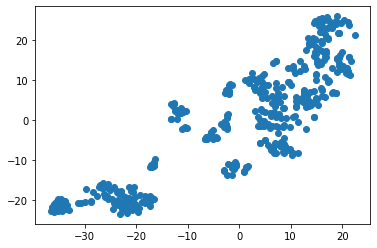

In [11]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.


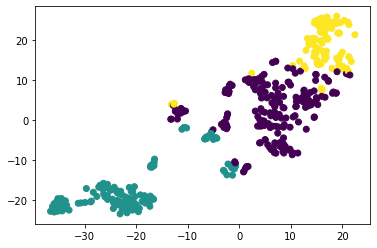

In [13]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

labels_train = kmeans.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

In [21]:
print(f'Среднеяя цена кластера 1 = {y_train[labels_train == 0].mean()}')
print(f'Среднеяя цена кластера 2 = {y_train[labels_train == 1].mean()}')    
print(f'Среднеяя цена кластера 3 = {y_train[labels_train == 2].mean()}')


Среднеяя цена кластера 1 = price    24.958115
dtype: float64
Среднеяя цена кластера 2 = price    16.165354
dtype: float64
Среднеяя цена кластера 3 = price    27.788372
dtype: float64


In [30]:
crim1 = X_train['CRIM'][labels_train == 0].mean()
crim2 = X_train['CRIM'][labels_train == 1].mean()
crim3 = X_train['CRIM'][labels_train == 2].mean()

In [32]:
print(f'Средний уровень преступности кластера 1 = {crim1}')
print(f'Средний уровень преступности кластера 2 = {crim2}')    
print(f'Средний уровень преступности кластера 3 = {crim3}')

Средний уровень преступности кластера 1 = 0.42166020942408367
Средний уровень преступности кластера 2 = 10.797028425196853
Средний уровень преступности кластера 3 = 0.07356558139534886
